<a href="https://colab.research.google.com/github/Hemanth2890/Placement_Prediction_Using_Resume_Parser/blob/main/AI_Project_Final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/placement_data.csv")
df

,CGPA,Backlogs,10th Percentage,12th Percentage,Internships,Coding Score,Certifications,Communication Skill,Hackathon Participation,Applications Submitted,Placed,Package (LPA)
0,8.00,3,63.64,81.14,2,456.91,0,1,1,43,1,19.30
1,7.36,0,77.20,96.65,0,579.21,1,3,1,12,1,32.62
2,8.15,2,67.63,68.60,3,635.67,2,3,0,22,1,27.60
3,9.02,4,67.28,88.30,1,420.18,1,1,1,17,1,10.49
4,7.27,2,63.67,84.07,3,288.34,2,3,1,49,1,26.29
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.22,2,74.57,69.79,0,695.02,1,1,0,17,0,0.00
996,9.30,3,61.97,85.37,0,715.00,1,3,0,27,1,9.61
997,8.14,0,84.47,68.28,1,478.17,2,4,0,42,1,49.97
998,6.93,2,75.04,64.76,0,670.56,0,5,0,36,1,32.91


CGPA                       0
Backlogs                   0
10th Percentage            0
12th Percentage            0
Internships                0
Coding Score               0
Certifications             0
Communication Skill        0
Hackathon Participation    0
Applications Submitted     0
Placed                     0
Package (LPA)              0
dtype: int64
                          count       mean         std     min       25%  \
CGPA                     1000.0    7.52223    0.958966    5.50    6.8500   
Backlogs                 1000.0    2.04500    1.424431    0.00    1.0000   
10th Percentage          1000.0   79.71334   11.380829   60.01   69.6475   
12th Percentage          1000.0   79.58607   11.098949   60.05   70.1075   
Internships              1000.0    1.50100    1.116802    0.00    0.0000   
Coding Score             1000.0  497.31911  171.635357  200.99  350.9425   
Certifications           1000.0    0.98000    0.781160    0.00    0.0000   
Communication Skill      1000.0

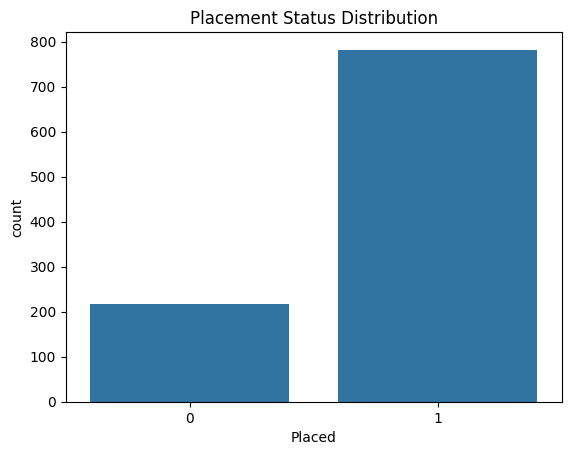

In [ ]:
print(df.isnull().sum())

print(df.describe().T)

sns.countplot(x=df["Placed"])
plt.title("Placement Status Distribution")
plt.show()

In [ ]:
X = df.drop(columns=["Placed", "Package (LPA)"])
y = df["Placed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        48
           1       0.93      0.97      0.95       152

    accuracy                           0.92       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.92      0.92      0.92       200



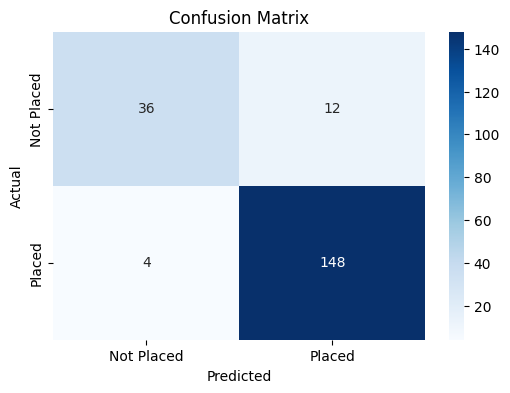

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Placed", "Placed"], yticklabels=["Not Placed", "Placed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

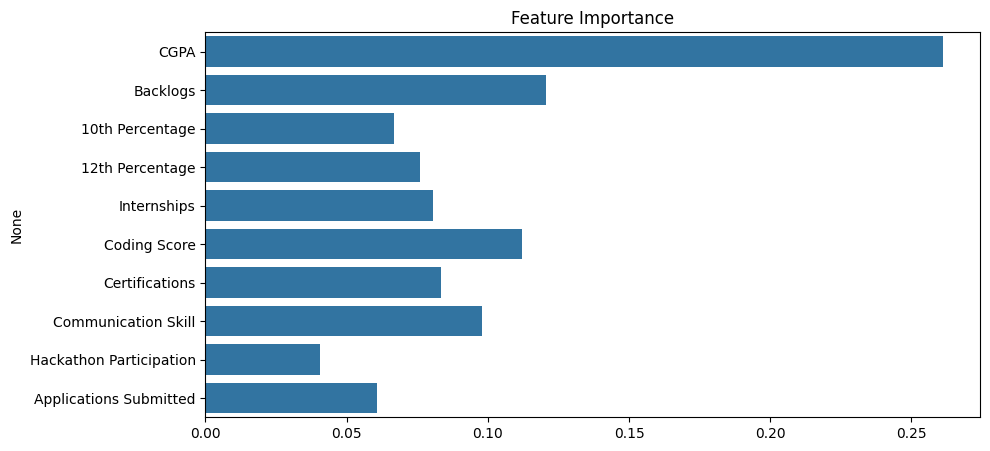

In [ ]:
importances = model.feature_importances_
feature_names = df.drop(columns=["Placed", "Package (LPA)"]).columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [ ]:
import joblib

joblib.dump(model, "placement_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_placed = df[df["Placed"] == 1]
X_package = df_placed.drop(columns=["Placed", "Package (LPA)"])
y_package = df_placed["Package (LPA)"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_package, y_package, test_size=0.2, random_state=42)

scaler_package = StandardScaler()
X_train_p_scaled = scaler_package.fit_transform(X_train_p)
X_test_p_scaled = scaler_package.transform(X_test_p)

xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.2, subsample=0.8, random_state=42)
eval_set = [(X_train_p_scaled, y_train_p), (X_test_p_scaled, y_test_p)]
xgb_model.fit(X_train_p_scaled, y_train_p, eval_set=eval_set, verbose=True)

xgb_model.save_model("xgb_package_model.json")
joblib.dump(scaler_package, "scaler_package.pkl")

print("Model and scaler saved successfully!")

[0]	validation_0-rmse:12.87023	validation_1-rmse:13.93042
[1]	validation_0-rmse:12.07181	validation_1-rmse:13.76960
[2]	validation_0-rmse:11.46208	validation_1-rmse:13.63181
[3]	validation_0-rmse:10.78527	validation_1-rmse:13.41120
[4]	validation_0-rmse:10.28858	validation_1-rmse:13.38564
[5]	validation_0-rmse:9.90563	validation_1-rmse:13.35469
[6]	validation_0-rmse:9.45882	validation_1-rmse:13.46944
[7]	validation_0-rmse:9.00435	validation_1-rmse:13.42713
[8]	validation_0-rmse:8.72989	validation_1-rmse:13.47865
[9]	validation_0-rmse:8.34807	validation_1-rmse:13.44502
[10]	validation_0-rmse:8.15534	validation_1-rmse:13.43120
[11]	validation_0-rmse:7.83519	validation_1-rmse:13.49687
[12]	validation_0-rmse:7.53145	validation_1-rmse:13.52803
[13]	validation_0-rmse:7.29648	validation_1-rmse:13.50497
[14]	validation_0-rmse:7.14377	validation_1-rmse:13.50168
[15]	validation_0-rmse:6.91952	validation_1-rmse:13.55960
[16]	validation_0-rmse:6.68580	validation_1-rmse:13.66177
[17]	validation_0-r

In [ ]:
xgb_model.load_model("xgb_package_model.json")
scaler_package = joblib.load("scaler_package.pkl")

df_placed = df[df["Placed"] == 1]
X_test_p = df_placed.drop(columns=["Placed", "Package (LPA)"])
y_test_p = df_placed["Package (LPA)"]

X_test_p_scaled = scaler_package.transform(X_test_p)

y_pred_xgb = xgb_model.predict(X_test_p_scaled)

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model(y_test_p, y_pred_xgb, "XGBoost Regressor")


XGBoost Regressor Performance:
Mean Absolute Error (MAE): 3.97
Mean Squared Error (MSE): 44.55
Root Mean Squared Error (RMSE): 6.67
R² Score: 0.77


In [ ]:
rf_classifier = joblib.load("placement_prediction_model.pkl")
xgb_model.load_model("xgb_package_model.json")
scaler = joblib.load("scaler.pkl")
scaler_package = joblib.load("scaler_package.pkl")

new_student = np.array([[6, 10, 93.6, 94, 2, 500, 10, 5, 10, 50]])

new_student_scaled = scaler.transform(new_student)

placement_prediction = rf_classifier.predict(new_student_scaled)[0]

if placement_prediction == 1:
    new_student_scaled_p = scaler_package.transform(new_student)
    predicted_package_xgb = xgb_model.predict(new_student_scaled_p)[0]

    print(f"Placement Status: Placed")
    print(f"Predicted Package (XGBoost): {predicted_package_xgb:.2f} LPA")

else:
    print("Placement Status: Not Placed | Package: 0 LPA")

Placement Status: Placed
Predicted Package (XGBoost): 33.77 LPA


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

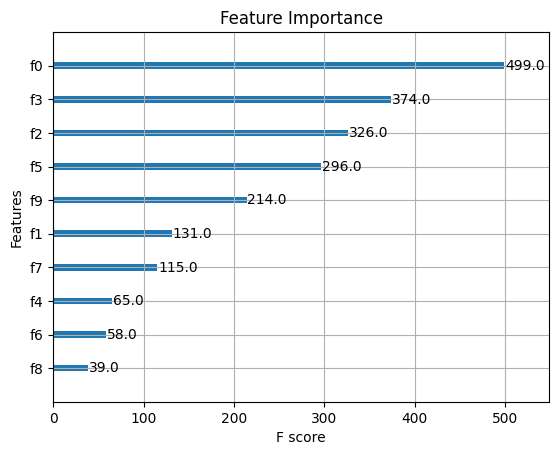

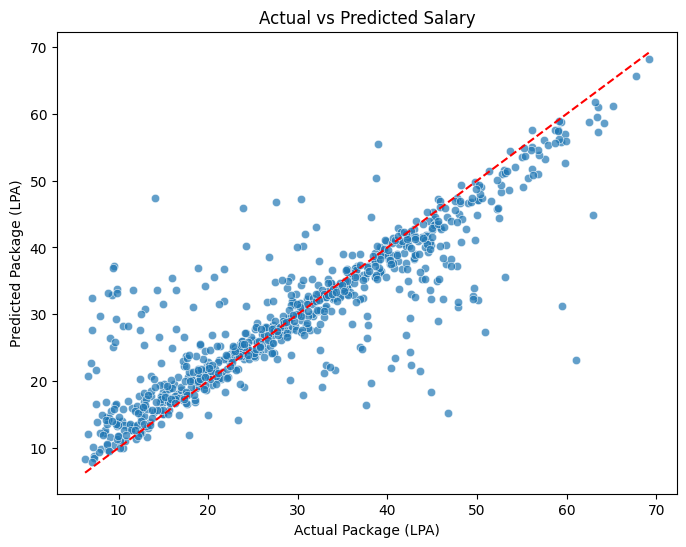

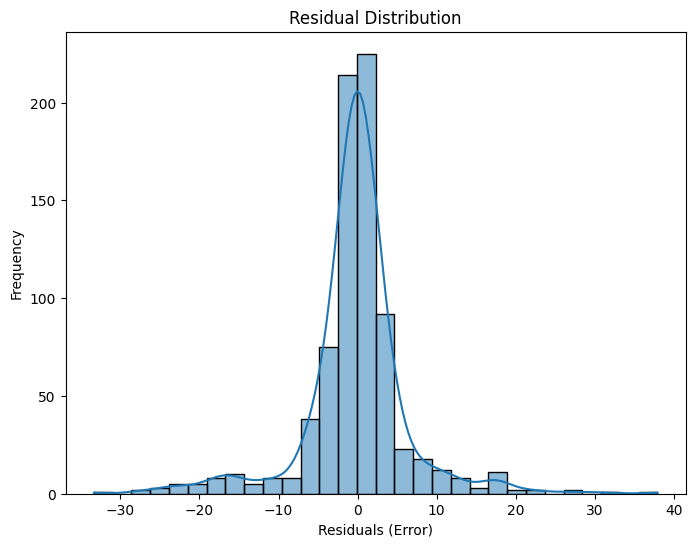

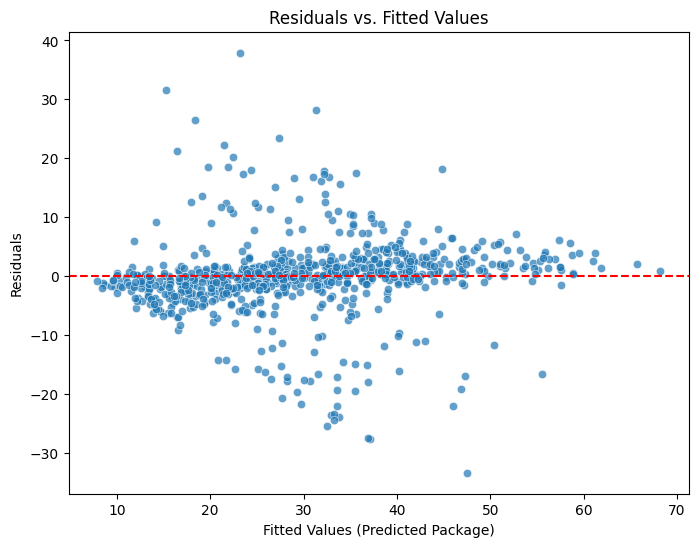

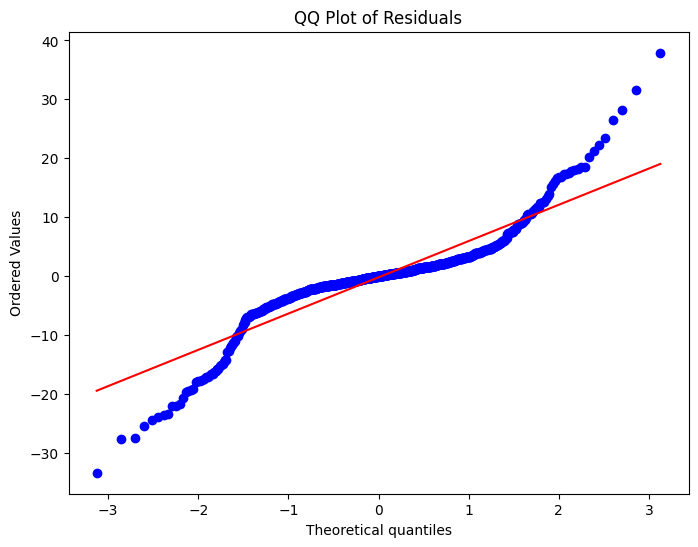

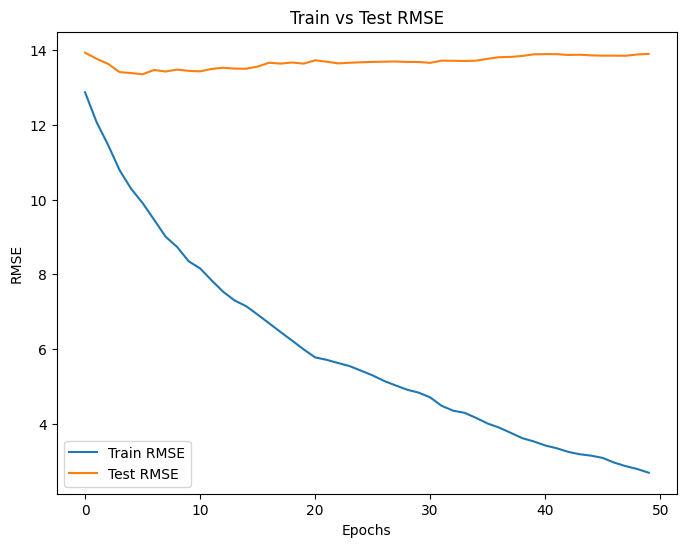

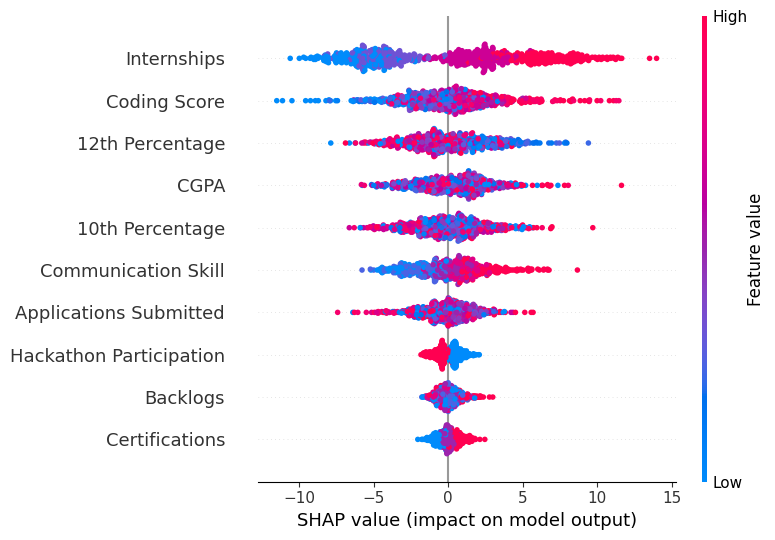

In [ ]:
import shap
import scipy.stats as stats
from xgboost import plot_importance

# Load trained model & scaler (if needed)
xgb_model.load_model("xgb_package_model.json")
scaler_package = joblib.load("scaler_package.pkl")

# Predict on test data
y_pred_p = xgb_model.predict(X_test_p_scaled)

# Calculate residuals
residuals = y_test_p - y_pred_p

# 1. Feature Importance Plot
plt.figure(figsize=(8, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()

# 2. Actual vs. Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_p, y=y_pred_p, alpha=0.7)
plt.xlabel("Actual Package (LPA)")
plt.ylabel("Predicted Package (LPA)")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--')  # Diagonal line
plt.show()

# 3. Residual Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 4. Residuals vs. Fitted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_p, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Package)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# 5. QQ Plot (Normality of Residuals)
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# 6. Learning Curve (Train vs Test RMSE)
results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label="Train RMSE")
plt.plot(x_axis, results['validation_1']['rmse'], label="Test RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Train vs Test RMSE")
plt.legend()
plt.show()

# 7. SHAP Summary Plot (Feature Importance with SHAP)
explainer = shap.Explainer(xgb_model, X_test_p_scaled)
shap_values = explainer(X_test_p_scaled)

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test_p)
plt.show()
